## 1. Generate Search query for person using (nltk, gensim)


### 1-1. Import libraries

In [3]:
import nltk
import gensim.downloader
from nltk.corpus import wordnet
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
# import openai
import os
from tqdm import tqdm
import cv2
import dlib
import numpy as np
from skimage import io
from PIL import Image
# Download WordNet corpus
# nltk.download('omw-1.4')
# nltk.download('wordnet')
# api_key
# openai.api_key = 'Your API KEY'



In [4]:
model = gensim.downloader.load('glove-twitter-200') #gensim collect words

### 1-2. Classify words from generated words of target appearance

In [5]:
def is_adjective_or_noun(word):
    synsets = wordnet.synsets(word)
    for synset in synsets:
        if synset.pos() == 'a': #synset.pos() 의미론적으로 연결된 단어 집합)의 품사를 반환 'a' = adjective
            return "adjective"
        elif synset.pos() == 'n':
            return "noun"
    return False

def generate_words():
    target_appearance = ["beautiful", "girl"] #해당 단어와 유사한 adj 및 noun을 출력
    similar_words = model.most_similar(positive=target_appearance, topn=1000)

    noun = []
    adj = []
    number = 2
    while len(adj) < 2 or len(noun) < 2:
        for word, similarity in similar_words:
            # print(word, is_adjective_or_noun(word), similarity)
            if is_adjective_or_noun(word) == "noun":
                if len(noun) < 2:
                    noun.append(word)
            elif is_adjective_or_noun(word) == "adjective":
                if len(adj) < 2:
                    adj.append(word)
    
    result = []
    for i in range(len(noun)):
        result.append(adj[i] + " " + noun[i])
        
    return result



# 2. Collect images from service using (requests, selenium, beautifulsoup)

### 2-1. Collect images from Google

Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connection adapters were found for ''
Error - No connectio
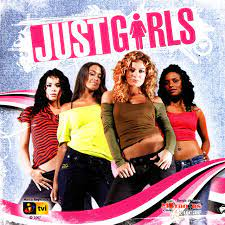
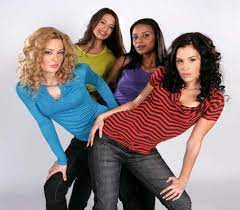
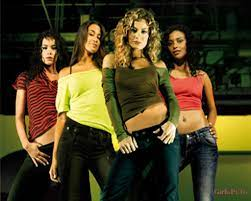
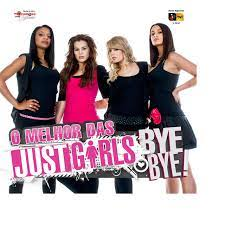
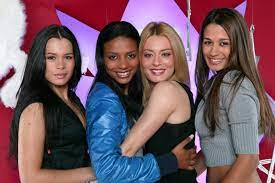
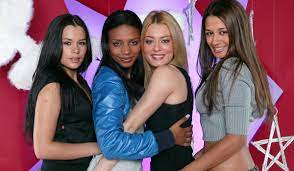
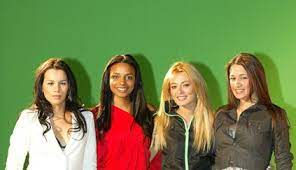
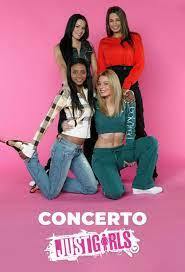
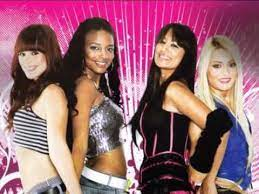
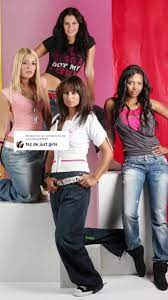
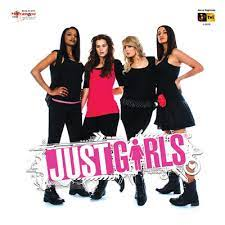
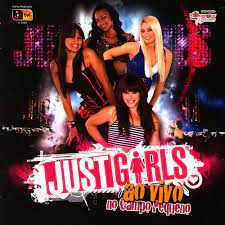
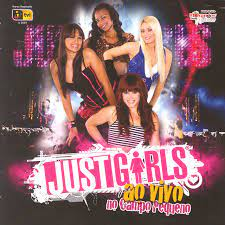
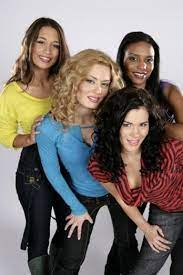
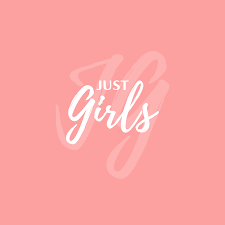
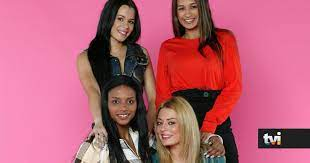
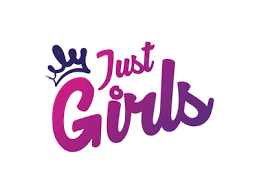
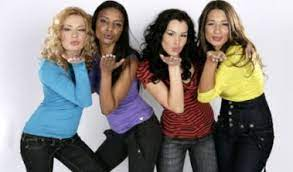
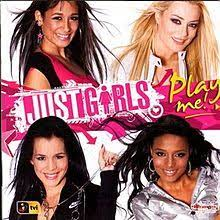
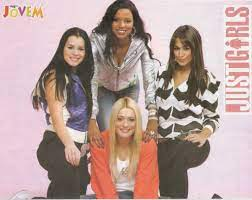
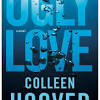
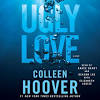
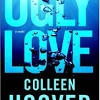
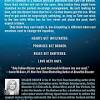
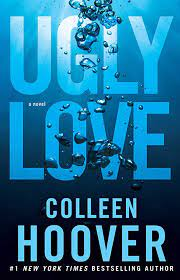
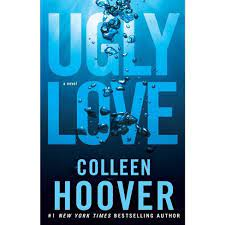
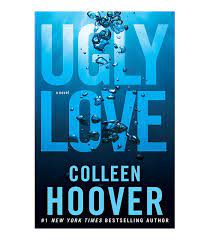
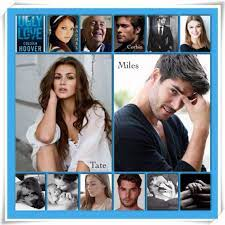
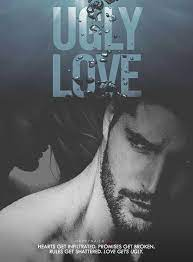
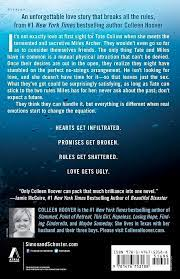
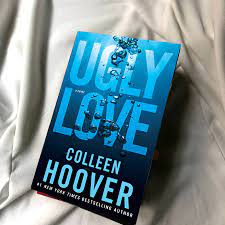
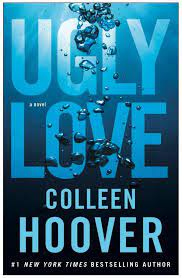
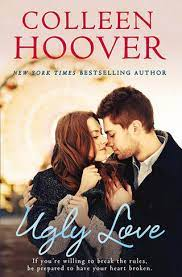
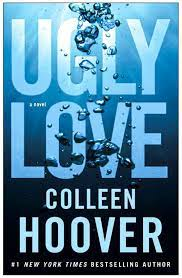
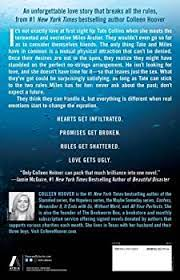
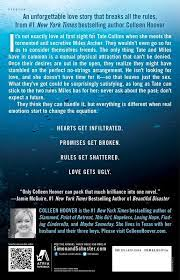
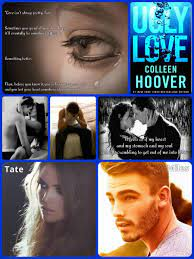
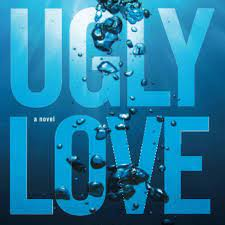
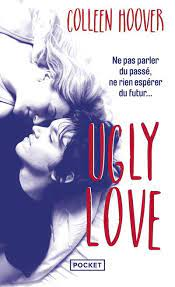
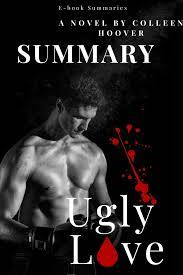
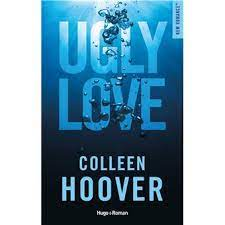
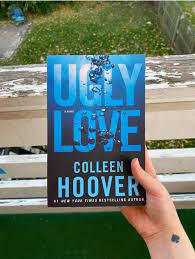
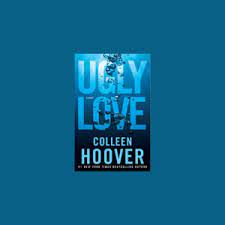
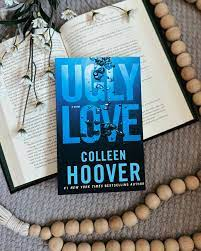

In [6]:
def collect_image(search_keyword):
    driver = webdriver.Chrome()
    search_url = f"https://www.google.co.kr/search?q={search_keyword}&tbm=isch"

    driver = webdriver.Chrome()
    driver.get(search_url)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    image_tags = soup.find_all('img', {'src':True})

    dir_path = search_keyword
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    for idx, img in enumerate(image_tags):
        try:
            image_url = img['src']
            image_name = f"{search_keyword}_{idx}.jpg"
            image_path = os.path.join(dir_path, image_name)
            response = requests.get(image_url, stream=True)
            if response.status_code == 200:
                with open(image_path, 'wb') as f:
                    f.write(response.content)
        except Exception as e:
            print(f"Error - {e}")

    driver.quit()


### 2-2. Collect images from Pinterest

In [7]:
def collect_image(search_keyword):
    driver = webdriver.Chrome()
    search_url = f'https://www.pinterest.com/search/pins/?q={search_keyword}'
    driver.get(search_url)
    # time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    image_tags = soup.find_all('img', {'src':True})

    if not os.path.exists(search_keyword):
        os.makedirs(search_keyword)
    if image_tags:
        for idx, img in enumerate(image_tags):
            image_url = img['src']
            image_url = image_url.replace("235x", "736x", 1)
            image_name = f"{search_keyword}_{idx}.jpg"
            image_path = os.path.join(search_keyword, image_name)
        response = requests.get(image_url)
        with open(image_path, 'wb') as f:
            f.write(response.content)
    driver.quit()
    
    return image_name_list
    
# if __name__ == '__main__':
#     words = generate_words()
#     image_name_list = []
#     for search_keyword in words:
#         image_name_list = collect_image(search_keyword)
    # get_file_paths(words)

### 2-3. Test Code of collectin image

In [8]:
def Test_code():
    driver = webdriver.Chrome()

    search_keywords = "뉴진스"
    search_url = f"https://www.google.co.kr/search?q={search_keywords}&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj4jP2swbL_AhXTklYBHdFmB_0Q_AUoAXoECAIQAw&biw=1478&bih=860&dpr=2"
    driver.get(search_url)
    # time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    image_tags = soup.find_all('img', {'src':True})

    if not os.path.exists(search_keywords):
        os.makedirs(search_keywords)
    if image_tags:
        for idx, img in enumerate(image_tags):
            image_url = img['src']
            image_url = image_url.replace("235x", "736x", 1)
            image_name = f"{search_keywords}_{idx}.jpg"
            image_path = os.path.join(search_keywords, image_name)
        response = requests.get(image_url)
        with open(image_path, 'wb') as f:
            f.write(response.content)
    driver.quit()

# 3. Detect face and find landmark using (dlib, opencv, pillow)

### 3-1. Collect image file path

In [9]:

def collect_image_file_path(search_keyword):
    file_image_list =[]
    for file_keyword in search_keyword:
        directory = f'/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/{file_keyword}'  # 원하는 디렉토리 경로를 넣으세요.
        file = os.listdir(directory)
        for file_name in file:
            directory = f'/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/{file_keyword}/{file_name}'
            # print(directory)
            file_image_list.append(directory)
    return file_image_list

    pd.DataFrame(words)




### 3-2. Check whether image contains Face or not

In [10]:
def image_face_check(file_image_list):
# Load the image
    image_path = file_image_list  # replace with your image path
    file_face_detected_list = []
    for i in image_path:
        try :
            image = Image.open(i)
            if image.mode != 'RGB':
                image = image.convert('RGB')
            image = np.array(image)
            # image = io.imread(image)
            # Load the detector
            detector = dlib.get_frontal_face_detector()
            # Apply the detector to the image
            detected_faces = detector(image, 1)  # The '1' here indicates that we should upsample the image 1 time. This will make everything bigger and allow us to detect more faces.
            if len(detected_faces) > 0:
                file_face_detected_list.append(i)
            # Print the number of faces detected
            print("Number of faces detected: {}".format(len(detected_faces)))
        except IOError:
            print("Error: The image file does not exist or cannot be accessed.")
        except ValueError:
            print("Error: Image is not in a valid format.")
        except Exception as e:
            print(f"An error occurred: {e}")

    
    return file_face_detected_list



Number of faces detected: 0
Number of faces detected: 0


/Users/juyoungkim/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 3
Number of faces detected: 4
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Error: The image file does not exist or cannot be accessed.
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces 

# 4. Alpha blending of Glasses

### 4-1. Detect face & Glasses Overlap

In [36]:

def detect_face(image_path):
  detector = dlib.get_frontal_face_detector()

  img = cv2.imread(image_path)
  faces = detector(img, 1)
  for face in faces:
    left_top = (face.left(), face.top())
    right_bottom = (face.right(), face.bottom())
    cv2.rectangle(img, left_top, right_bottom, (0,0,255),2) #bgr
  
  # cv2.imshow("img",img)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()

def face_detect(image):
  left_top = (0,0)
  right_bottom = (0,0)

  detector = dlib.get_frontal_face_detector()
  face_rect_list = detector(image, 1)

  if len(face_rect_list) > 0:
    face_rect = face_rect_list[0]
    left_top = (face_rect.left(), face_rect.top())
    right_bottom = (face_rect.right(), face_rect.bottom())

  return left_top, right_bottom

def face_sample(img):
  image = cv2.imread(img)
  lt, rb = face_detect(image)
  cv2.rectangle(image, lt, rb, (0,0,255), thickness=1)
  # cv2.imshow("img",image)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
  
def face_detect_multi(image):
  detector = dlib.get_frontal_face_detector()
  face_rect_list = detector(image, 1)

  results = []

  for face_rect in face_rect_list:
    left_top = (face_rect.left(), face_rect.top())
    right_bottom = (face_rect.right(), face_rect.bottom())
    results.append((left_top, right_bottom))

  return results

def face_sample1(img):
  image = cv2.imread(img)
  for lt, rb in face_detect_multi(image):
    print(lt, rb)
    cv2.rectangle(image, lt, rb, (0,0,255), thickness=1)
    # cv2.circle(image, ((lt + rb)/2), ((rb-lt)/2), (0,0,255), thickness=1)
    #cv2.circle(img, center, radius, color, thickness)

def draw_landmark_point(image_path): #point 추가
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor('/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/shape_predictor_68_face_landmarks.dat')
  img = image_path
#   img = cv2.imread(image_path)
  faces = detector(img, 1)
  for face in faces:
    shape = predictor(img, face)
    for x in range(68):
      pts = (shape.part(x).x, shape.part(x).y)
      cv2.circle(img, pts, 1, (255,0,0), cv2.FILLED, cv2.LINE_AA)
    cv2.imwrite('new_image.jpg', image) #image 저장
    #cv2.imshow("img",img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

def draw_landmark(image_path):
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor('/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/shape_predictor_68_face_landmarks.dat')
  image = image_path
  #image = cv2.imread(image_path)

  for face_rect in detector(image, 0):
    shape = predictor(image, face_rect)
    for x in range(68):
      pts = (shape.part(x).x, shape.part(x).y)
      cv2.circle(image, pts, 1, (255,0,0),cv2.FILLED, cv2.LINE_AA)
      cv2.putText(image, f"{x}", pts, cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
    cv2.imwrite('new_image.jpg', image) #image 저장
  
#   cv2.imshow("img",image)
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()

  print("hello!")

def detect_faces(img):
  result = []
  for face_rect in detector(img, 0):
    shape = predictor(img, face_rect)
    result.append(shape)
  return result

def blend_glasses(image, glasses, faces):
  for face in faces:
    glasses_width = int((face.part(45).x - face.part(36).x) * 1.4)
    left = int(face.part(36).x - glasses_width * 0.15)
    glass_height = glasses_width / 240 * 112
    top = int((face.part(36).y + face.part(45).y) / 2 - glass_height / 2.5)

    glasses = cv2.resize(glasses, (glasses_width, int(glasses_width / 240 * 112)))
    alpha = cv2.cvtColor(glasses[:,:,3], cv2.COLOR_GRAY2BGR) / 255.0
    image[top:top+glasses.shape[0], left:left+glasses.shape[1],:3] = \
    (1.0 - alpha) * image[top:top+glasses.shape[0], left:left+glasses.shape[1], :3] + alpha * glasses[:,:,:3]
  cv2.imwrite(f'/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/final_image/glassses_new_image_{time.time()}.jpg', image) #image 저장
  # cv2.imshow("img",image)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
  
def rotate(img, angle, scale = 1.0):
  center  = (img.shape[1] // 2, img.shape[0] // 2)
  M = cv2.getRotationMatrix2D(center, angle, scale)

  rotated_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
  return rotated_img


# 5. Console Run 

In [37]:
# 1. import & Start
if __name__ == '__main__':
    # 1.2 to 2.1. Generate wordsCollect image from google
    words = generate_words()
    image_name_list = []
    for search_keyword in words:
        image_name_list = collect_image(search_keyword)

    # 3.1. Collect image directory path
    file_image_list = collect_image_file_path(words)

    # 3.2. Check Wheter image contains face or not
    file_face_detected_list = image_face_check(file_image_list)
    print(file_face_detected_list)

    # 3.3. face detect and glasses overlap
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/shape_predictor_68_face_landmarks.dat")
    img_list = file_face_detected_list
    # Test img_list
    # img_list = ['/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/image/사진3.jpeg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/image/sung.jpeg',"/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/image/you.jpeg","/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/image/nobel.jpeg"]
    # img_list = ['/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_54.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_56.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_47.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_45.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_30.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_74.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_72.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/just girls/just girls_70.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/ugly love/ugly love_69.jpg', '/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/ugly love/ugly love_60.jpg']
    for i in img_list:
        image = cv2.imread(i)
        faces = detect_faces(image)
        draw_landmark_point(image)
        glasses = cv2.imread("/Users/juyoungkim/Development/aie/aie_opensourceSW/face_collector _aie_opensourceSW_final/image/glasses.png", cv2.IMREAD_UNCHANGED)
        blend_glasses(image, glasses, faces)

Number of faces detected: 0
Number of faces detected: 0


/Users/juyoungkim/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 3
Number of faces detected: 4
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Error: The image file does not exist or cannot be accessed.
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces 